In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data=pd.read_csv("./data.csv")

In [3]:
data.shape

(520, 17)

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
Data=data

In [71]:
Data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [12]:
def to_bit(column_name,data):
    data[column_name]=(data[column_name]=="Yes").astype(int)
for i in Data.columns[2:]:
    to_bit(i,Data)

Here we are going to check for any age outliers by plotting it against diabetes

In [14]:
Data["Gender"]=Data["Gender"].map({"Male":1,"Female":0})

In [16]:
sns.catpl

array([1, 0])

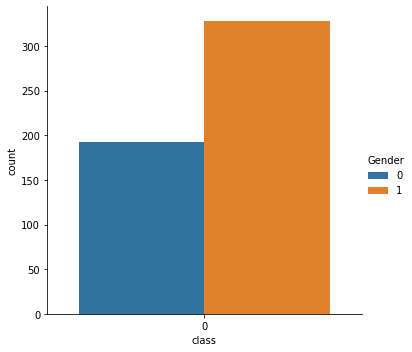

In [26]:
sns.catplot(x="class",kind="count",data=Data,hue="Gender")

### From the above plot it seems that Males are more prone to diabetes but this might be misleading

In [ ]:
Data["Class"]=data["class"]
Data["Class"]=Data["Class"].map({"Positive":1, "Negative":0})

In [96]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(Data.iloc[:,:-1],Data.iloc[:,-1],train_size=0.8,random_state=1)

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(trainX,trainY)

RandomForestClassifier()

In [98]:
pred=model.predict(testX)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [108]:
print(accuracy_score(pred,testY))
print(".....................")
print(classification_report(pred,testY))

0.9038461538461539
.....................
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.87      0.93        76

    accuracy                           0.90       104
   macro avg       0.87      0.93      0.89       104
weighted avg       0.93      0.90      0.91       104



## Support Vector Classifier

In [112]:
from sklearn.svm import SVC
model=SVC(gamma=0.8,degree=0.8,max_iter=10000)
model.fit(trainX,trainY)
pred=model.predict(testX)
accuracy_score(pred,testY)

0.9038461538461539

In [110]:
print(classification_report(pred,testY))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.87      0.93        76

    accuracy                           0.90       104
   macro avg       0.87      0.93      0.89       104
weighted avg       0.93      0.90      0.91       104



## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=list()
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(trainX,trainY)
    pred=model.predict(testX)
    accuracy.append(accuracy_score(pred,testY))


In [122]:
print(accuracy[0])

0.9134615384615384

### KNN with K=1 gives the best accuracy

# Artificial Neural Network

In [131]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import normalize
#Normalizing the data
Xtrain=normalize(trainX)
Xtest=normalize(testX)
# Defining the model
model=keras.models.Sequential()
model.add(keras.layers.Flatten()) #Flattens the input
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) #Adding input layer with 128 neurons and relu activation func
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
# Adam Optimiser converges faster than any other existing optimizer
# sparse categorical crossentropy combines the good of crossentropy and one hot encoding
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(Xtrain,trainY,epochs=1000,callbacks=False)

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13/13 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5817
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6106
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6106
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6106
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6106
Epoch 6/

13/13 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9279
Epoch 76/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9231
Epoch 77/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9207
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1801 - accuracy: 0.9327
Epoch 79/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9231
Epoch 80/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9279
Epoch 81/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9351
Epoch 82/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9207
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9327
Epoch 84/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9231
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9207
Epoch 156/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9423
Epoch 157/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9327
Epoch 158/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9351
Epoch 159/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.9183
Epoch 160/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9327
Epoch 161/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9255
Epoch 162/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9351
Epoch 163/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9351
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9399
Epoch 236/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9471
Epoch 237/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9399
Epoch 238/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9447
Epoch 239/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9375
Epoch 240/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9399
Epoch 241/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9375
Epoch 242/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9351
Epoch 243/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9471
Epoch 244/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.

13/13 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9567
Epoch 316/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9495
Epoch 317/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9567
Epoch 318/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9519
Epoch 319/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9591
Epoch 320/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9567
Epoch 321/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9471
Epoch 322/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9495
Epoch 323/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9615
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9688
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9663
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9712
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9615
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9736
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9688
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9688
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9712
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9688
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9712
Epoch 476/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9760
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9784
Epoch 478/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9784
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9688
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9784
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9784
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9784
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9736
Epoch 484/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.

KeyboardInterrupt: 

In [129]:
loss, accuracy=model.evaluate(Xtest,testY)

4/4 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9712


In [130]:
print(loss)
print("..............")
print(accuracy)

0.07877596467733383
..............
0.9711538553237915


## Probabilistic Neural Network